# Maximum a Posteriori

In [1]:
using Distributions
using HMMBase
using PyPlot
using Seaborn

rc("axes", xmargin = 0) # hide
set_style("whitegrid")  # hide

Let's consider a simple time series with one outlier:

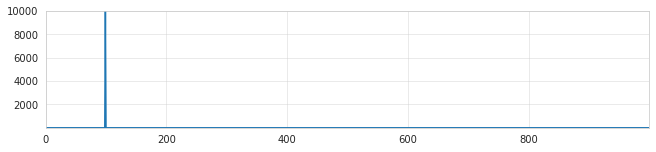

In [2]:
y = rand(1000)
y[100] = 10000
figure(figsize = (9, 2)) # hide
plot(y)
gcf() # hide

An MLE approach for the observations distributions parameters
may fail with a singularity (variance = 0) if an outlier
becomes the only observation associated to some state:

In [3]:
hmm = HMM([0.9 0.1; 0.1 0.9], [Normal(0, 1), Normal(5, 1)])
try
    fit_mle(hmm, y, display = :iter)
catch e
    println(e)
end

Iteration 0: logtot = -4.995120506098963e7
Iteration 1: logtot = -177.66544956990887
Iteration 2: logtot = -39.036419273089976
Iteration 3: logtot = NaN
ArgCheck.CheckError("isprobvec(hmm.a) must hold. Got\nhmm.a => [NaN, NaN]")


We can avoid this by putting a prior on the variance:

Iteration 0: logtot = -4.995120506098963e7
Iteration 1: logtot = -176.7826667493834
Iteration 2: logtot = -171.0715560431436
Iteration 3: logtot = -171.0715560431436
EM converged in 3 iterations, logtot = -171.0715560431436


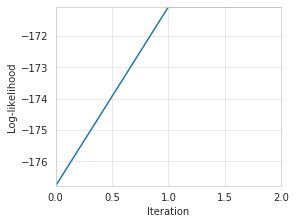

In [4]:
import ConjugatePriors: InverseGamma, NormalKnownMu, posterior_canon
import StatsBase: Weights

function fit_map(::Type{<:Normal}, observations, responsibilities)
    μ = mean(observations, Weights(responsibilities))

    ss = suffstats(NormalKnownMu(μ), observations, responsibilities)
    prior = InverseGamma(2, 1)
    posterior = posterior_canon(prior, ss)
    σ2 = mode(posterior)

    Normal(μ, sqrt(σ2))
end

hmm, hist = fit_mle(hmm, y, estimator = fit_map, display = :iter)
figure(figsize = (4, 3)) # hide
plot(hist.logtots)
xlabel("Iteration") # hide
ylabel("Log-likelihood") # hide
gcf() # hide

In [5]:
hmm.B

2-element Array{Distributions.Distribution{Distributions.Univariate,S} where S<:Distributions.ValueSupport,1}:
 Distributions.Normal{Float64}(μ=0.49576380243596535, σ=0.2874264872687068)
 Distributions.Normal{Float64}(μ=10000.0, σ=0.5345224838248488)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*